# HW 1 Jingrong Tian

## Pre-processing file

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [2]:
# read in csv file
data =  pd.read_csv("Hitters.csv")


# keep only numeric variables
# By checking the dtypes of the dataframe, we can observe that the only numeric types are float64 and int64
data = data.select_dtypes(include=['float64','int64'])

#drop rows that contain NaN
data = data.dropna()

In [3]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [4]:
X_raw = data.drop('Salary',axis=1)
X_std = preprocessing.normalize(X_raw)
X = pd.DataFrame(data=X_std, columns=X_raw.columns)
Y = data['Salary']

## 1.1 Lasso

### 1.1.1 Lasso without Cross Validation

In [5]:
#Lasso
lasso = Lasso(alpha=0.1,max_iter=10000)
lasso.fit(X,Y)
print("the test score for lasso is: ", lasso.score(X,Y))

the test score for lasso is:  0.5695582458632213


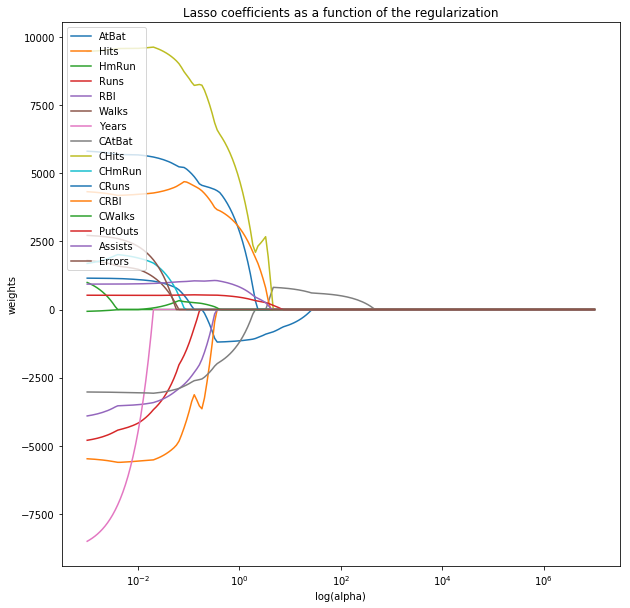

In [6]:
# Compute paths

n_alphas = 200
alphas = np.logspace(-3, 7, n_alphas)

coefs = []
for a in alphas:
    lso = Lasso(alpha=a,max_iter=10000, fit_intercept=False)
    lso.fit(X, Y)
    coefs.append(lso.coef_)

# #############################################################################
# Display results

plt.figure(figsize=(10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.legend(X.columns, loc="upper left")
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 1.1.2 Lasso with CrossValidation to Find Optimal Penalty

In [7]:
model = LassoCV(cv=10).fit(X,Y)
print("the optimal penalty is:",model.alpha_)

the optimal penalty is: 0.1371821429861081


array([   -0.        , -3444.65714893,    -0.        ,  -402.98421592,
       -2375.14007167,     0.        ,    -0.        , -2816.44983573,
        8134.59612707,     0.        ,  4660.10589116,  4447.07901303,
         192.86762676,   388.22612943,   936.132407  ,     0.        ])

In [9]:
#index of three remaining predictors are
index = np.absolute(model.coef_).argsort()[-3:][::-1]
print("three preditors are: ", X.columns[index[0]],X.columns[index[1]],X.columns[index[2]])

three preditors are:  CHits CRuns CRBI


## 1.2 Ridge

### 1.2.1 Ridge without CV to Find Final Three Predictors that Remain in the Model

In [10]:
#Ridge
ridge = Ridge(alpha=0.1,max_iter=10000)
ridge.fit(X,Y)
print("the test score for lasso is: ", lasso.score(X,Y))

the test score for lasso is:  0.5695582458632213


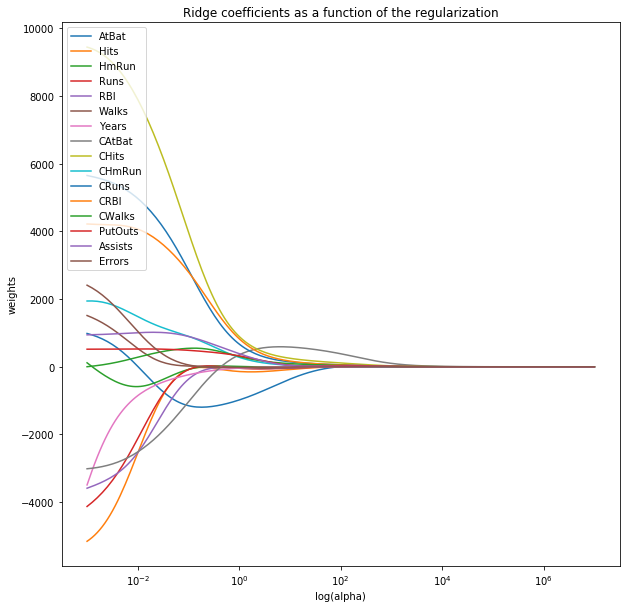

In [11]:
# Compute paths

n_alphas = 200
alphas = np.logspace(-3, 7, n_alphas)

coefs = []
for a in alphas:
    rdg = Ridge(alpha=a,max_iter=10000, fit_intercept=False)
    rdg.fit(X, Y)
    coefs.append(rdg.coef_)

# #############################################################################
# Display results

plt.figure(figsize=(10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.legend(X.columns, loc="upper left")
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 1.2.2 Ridge with CrossValidation to Find Optimal Penalty

In [5]:
clf= RidgeCV(cv = 10).fit(X,Y)

In [6]:
print("the optimal penalty is: ", clf.alpha_)

the optimal penalty is:  0.1


In [14]:
#index of three remaining predictors are
index = np.absolute(clf.coef_).argsort()[-3:][::-1]
print("three preditors are: ", X.columns[index[0]],X.columns[index[1]],X.columns[index[2]])

three preditors are:  CHits CRuns CRBI


## 2. Short Answer

### 1)  bias-variance tradeoff: The bias–variance tradeoff is the property of a set of predictive models whereby models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples, and vice versa.

### 2) Role of Regularization in tradeoff: Regularization performs feature selection by shrinking the contribution of each features. By giving differenct weights to all attributes, the model would be less likely to be affected by overfitting

### 3) When the penalty term increases, the loss function for both ridge and lasso would also increase, forcing the model to abandon some attributes. Therefore, as alpha increases, the number of attributes fading at x-axis increases.